In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utility
import joblib
import os

# Scikit-learn modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# Set visual style
sns.set(style="whitegrid")

In [5]:
# Create directories for outputs
os.makedirs("output", exist_ok=True)

In [9]:
data = ("consumer_electronics_sales_data.csv")

# Load the dataset
df = pd.read_csv(data)

# Display first 5 rows to understand structure
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [11]:
# Display last 5 rows
df.tail()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1
8999,14873,Smartphones,Sony,2315.583087,62,0,15,2,1


In [13]:
# Basic information
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (9000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [15]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [17]:
# Remove columns that are not useful for segmentation (e.g., ProductID)
if "ProductID" in df.columns:
    df.drop(columns=["ProductID"], inplace=True)

In [19]:
# Comfirm columns
df.columns

Index(['ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge',
       'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction',
       'PurchaseIntent'],
      dtype='object')

In [23]:
# Show missing values
missing = df.isnull().sum()
# print("Missing values:\n", missing[missing > 0])

missing

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [25]:
# Check duplicates
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


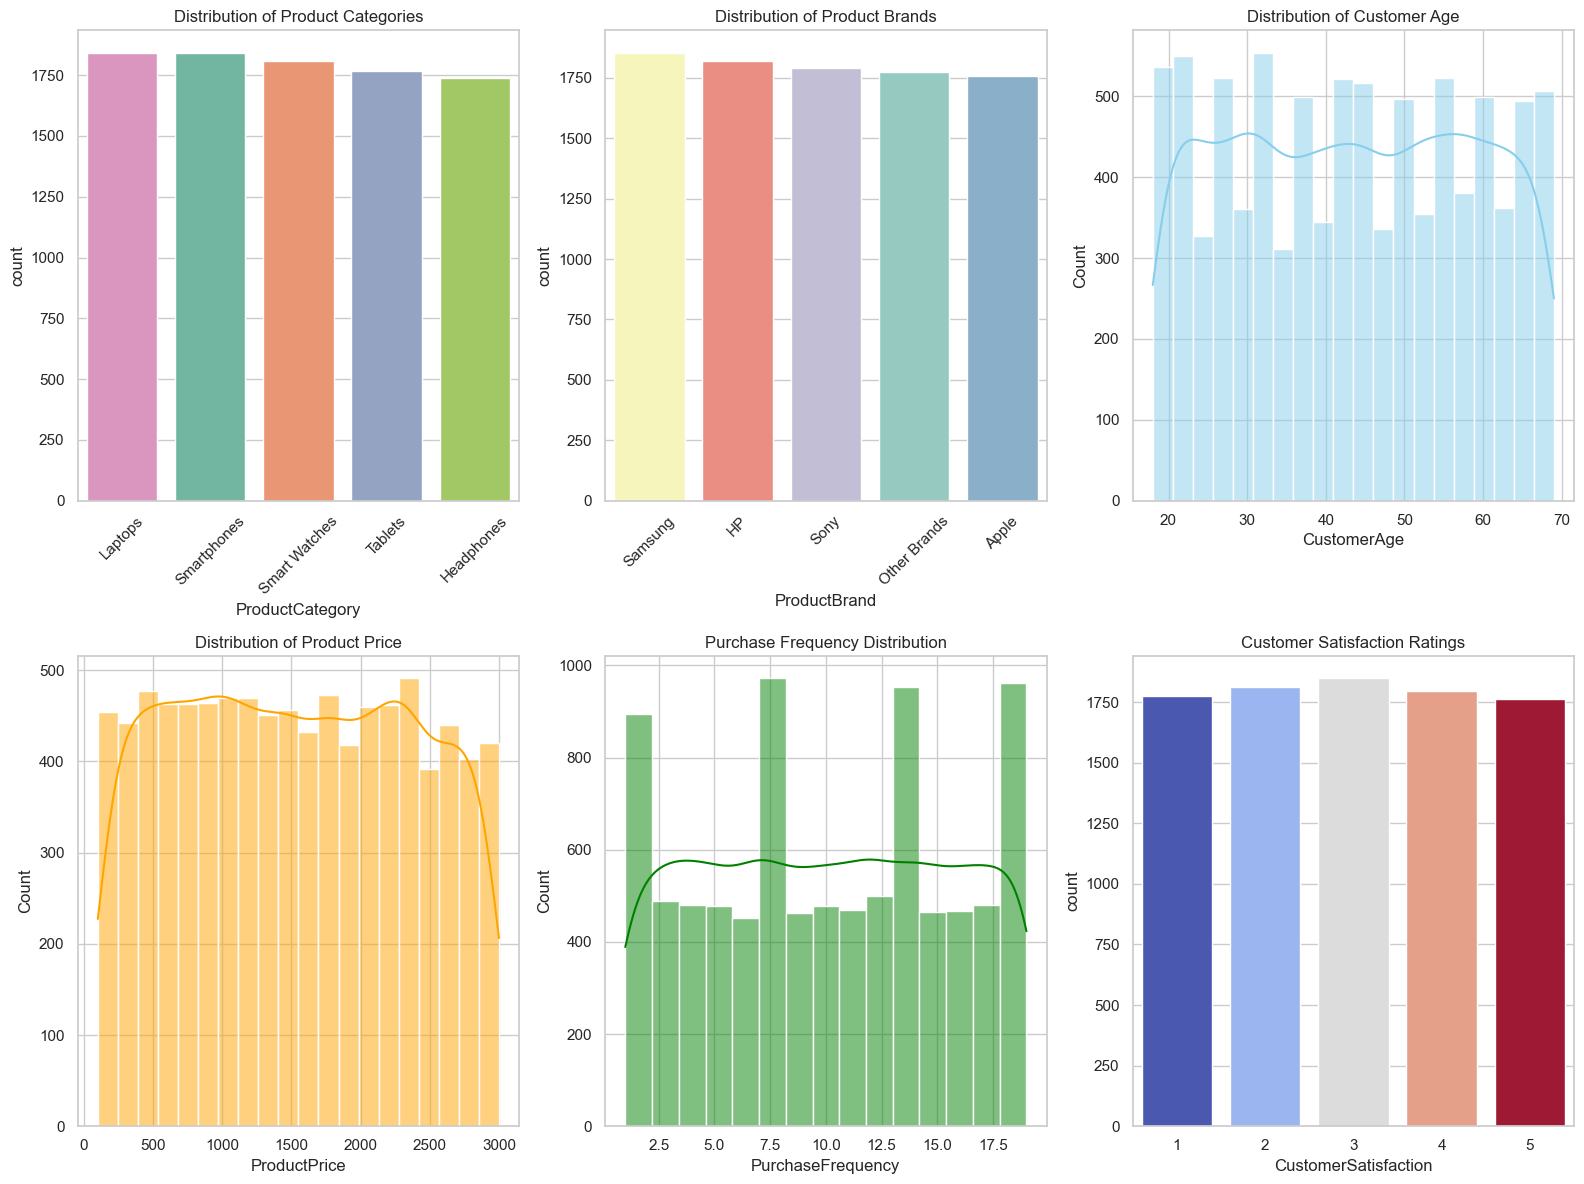

In [27]:
# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# 1. Distribution of Product Categories
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='ProductCategory', hue='ProductCategory',
              order=df['ProductCategory'].value_counts().index,
              palette='Set2', legend=False)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)

# 2. Distribution of Product Brands
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='ProductBrand', hue='ProductBrand',
              order=df['ProductBrand'].value_counts().index,
              palette='Set3', legend=False)
plt.title('Distribution of Product Brands')
plt.xticks(rotation=45)

# 3. Customer Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='CustomerAge', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')

# 4. Product Price Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='ProductPrice', bins=20, kde=True, color='orange')
plt.title('Distribution of Product Price')

# 5. Purchase Frequency Distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='PurchaseFrequency', bins=15, kde=True, color='green')
plt.title('Purchase Frequency Distribution')

# 6. Customer Satisfaction Distribution
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='CustomerSatisfaction', hue='CustomerSatisfaction',
              palette='coolwarm', legend=False)
plt.title('Customer Satisfaction Ratings')

plt.tight_layout()
plt.savefig("output/eda_distribution_plots.png")  # save the plot
plt.show()


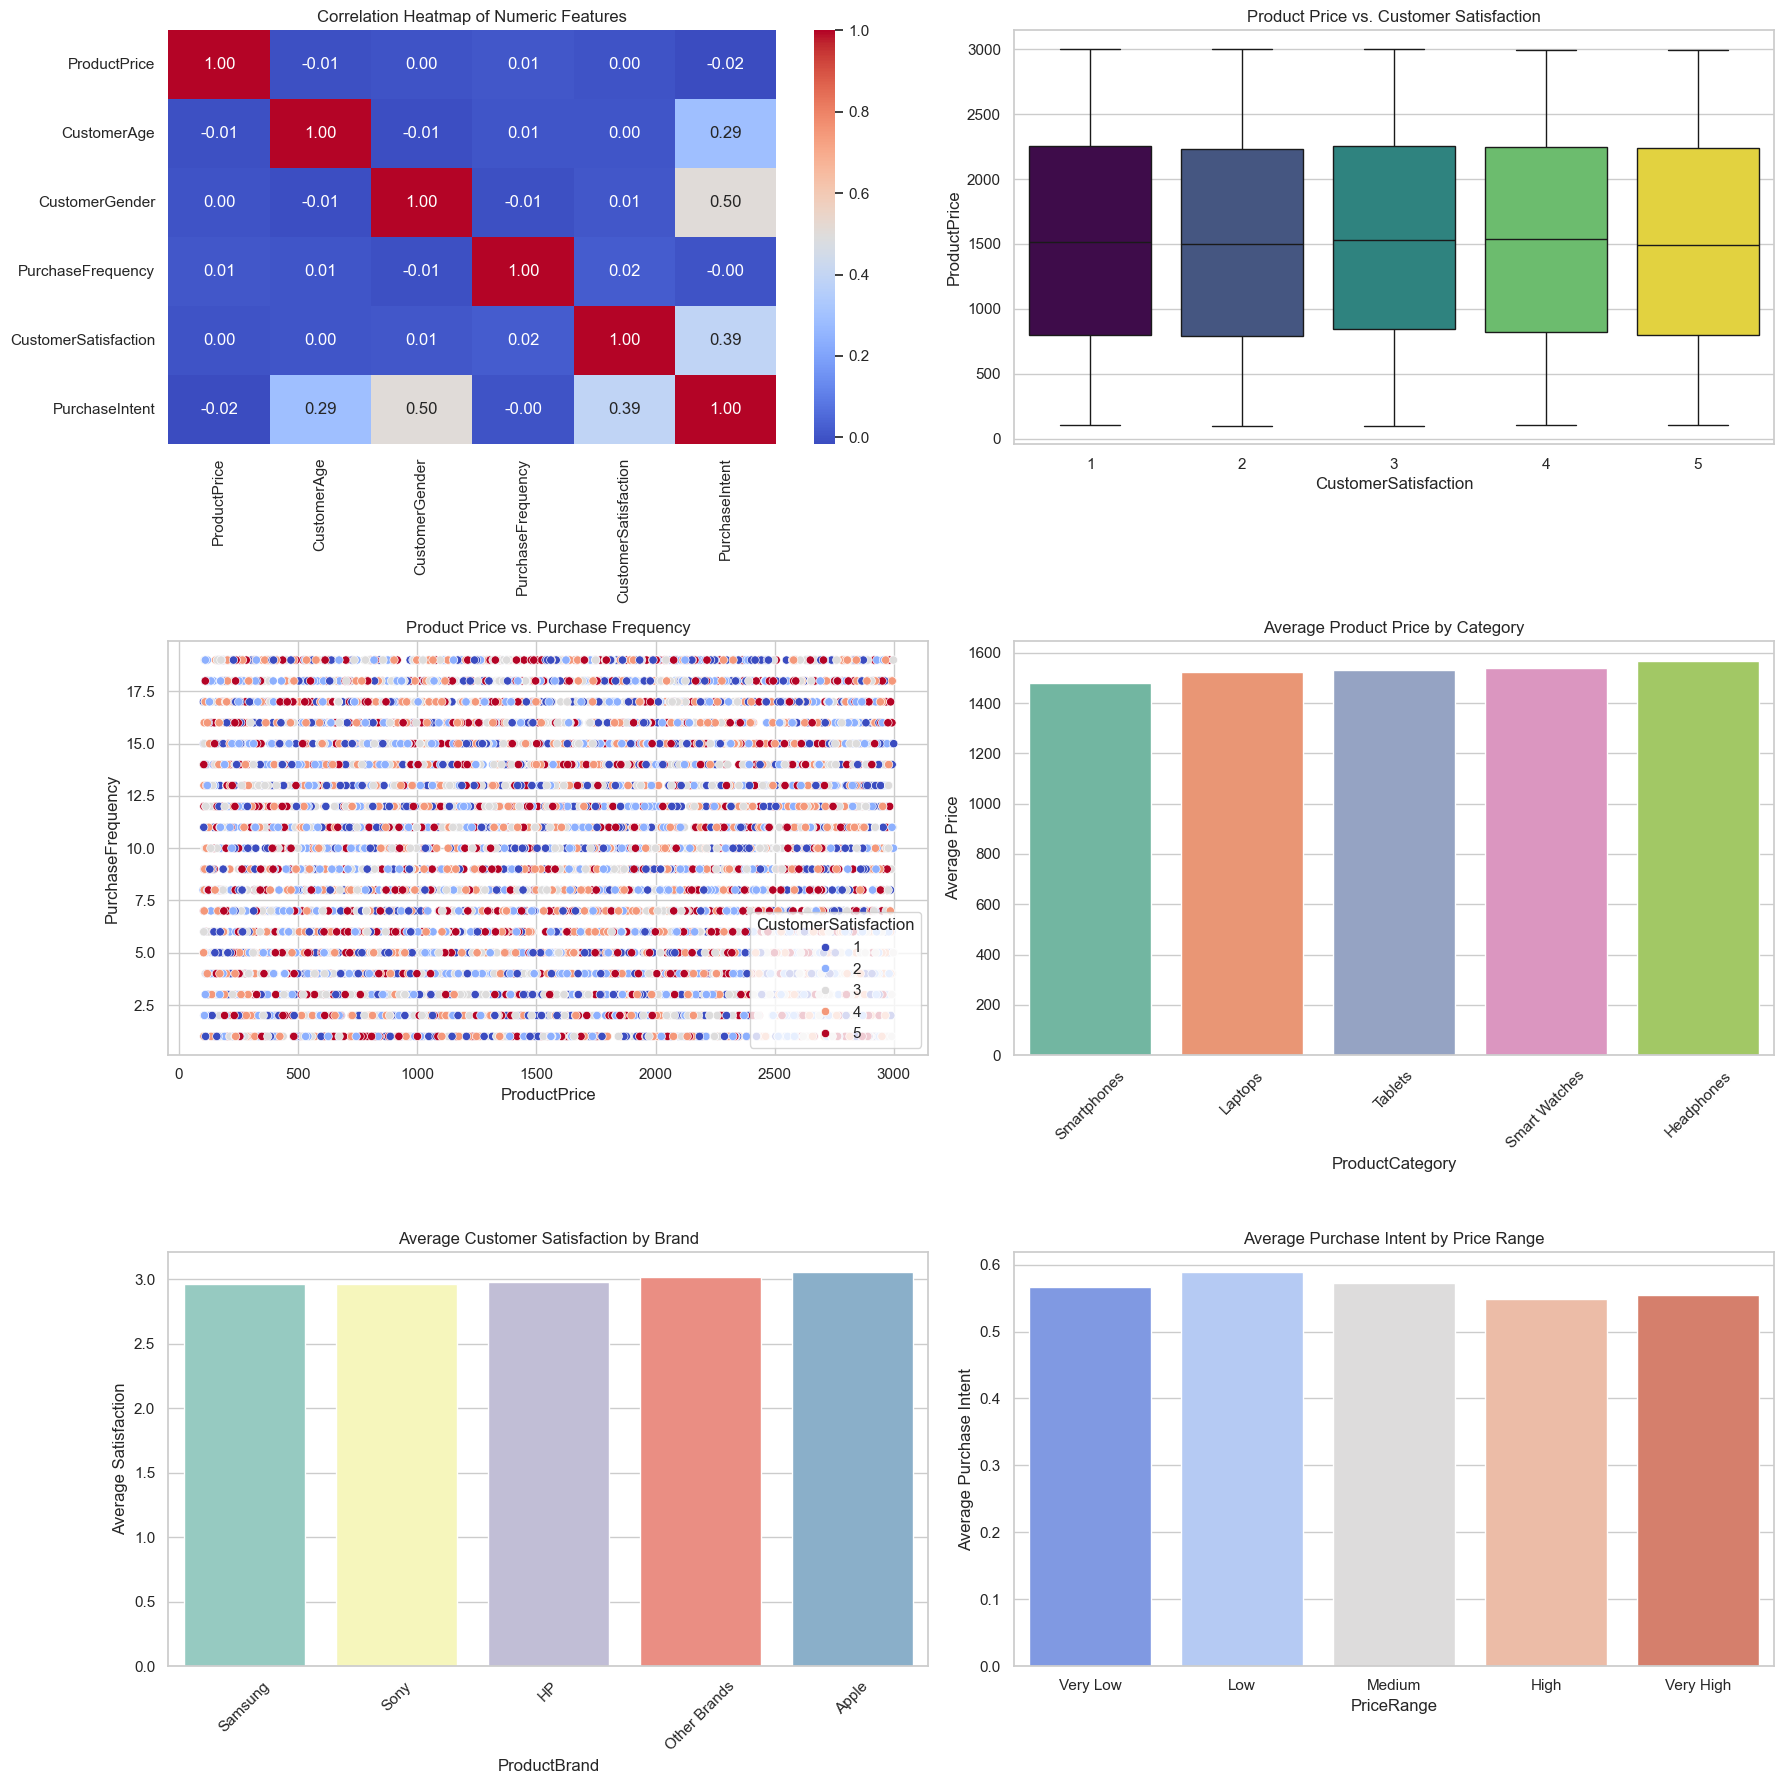

In [29]:
# Create a new column for price range
df['PriceRange'] = pd.qcut(df['ProductPrice'], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# Compute grouped statistics with observed=False to suppress FutureWarning
avg_price_category = df.groupby('ProductCategory', observed=False)['ProductPrice'].mean().sort_values()
avg_satisfaction_brand = df.groupby('ProductBrand', observed=False)['CustomerSatisfaction'].mean().sort_values()
intent_by_price = df.groupby('PriceRange', observed=False)['PurchaseIntent'].mean()

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
sns.set(style="whitegrid")

# 1. Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title("Correlation Heatmap of Numeric Features")

# 2. Product Price vs. Customer Satisfaction
sns.boxplot(data=df, x='CustomerSatisfaction', y='ProductPrice', hue='CustomerSatisfaction',
            palette='viridis', ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Product Price vs. Customer Satisfaction")

# 3. Product Price vs. Purchase Frequency
sns.scatterplot(data=df, x='ProductPrice', y='PurchaseFrequency', hue='CustomerSatisfaction',
                palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Product Price vs. Purchase Frequency")

# 4. Average Product Price by Category
sns.barplot(x=avg_price_category.index, y=avg_price_category.values, hue=avg_price_category.index,
            palette='Set2', ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Average Product Price by Category")
axes[1, 1].set_xticks(range(len(avg_price_category.index)))
axes[1, 1].set_xticklabels(avg_price_category.index, rotation=45)
axes[1, 1].set_ylabel("Average Price")

# 5. Average Customer Satisfaction by Brand
sns.barplot(x=avg_satisfaction_brand.index, y=avg_satisfaction_brand.values, hue=avg_satisfaction_brand.index,
            palette='Set3', ax=axes[2, 0], legend=False)
axes[2, 0].set_title("Average Customer Satisfaction by Brand")
axes[2, 0].set_xticks(range(len(avg_satisfaction_brand.index)))
axes[2, 0].set_xticklabels(avg_satisfaction_brand.index, rotation=45)
axes[2, 0].set_ylabel("Average Satisfaction")

# 6. Purchase Intent by Price Range
sns.barplot(x=intent_by_price.index, y=intent_by_price.values, hue=intent_by_price.index,
            palette='coolwarm', ax=axes[2, 1], legend=False)
axes[2, 1].set_title("Average Purchase Intent by Price Range")
axes[2, 1].set_ylabel("Average Purchase Intent")

# Final layout adjustments
plt.tight_layout()
plt.savefig("output/eda_relationship_plots.png")
plt.show()


In [31]:
df['ProductCategory'] = df['ProductCategory'].astype('category')
df['ProductBrand'] = df['ProductBrand'].astype('category')

In [33]:
# Use one-hot encoding to convert categorical variables into numerical
encoded_df = pd.get_dummies(df, drop_first=True)
print("\nEncoded DataFrame Preview:")
print(encoded_df.head())



Encoded DataFrame Preview:
   ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
0    312.949668           18               0                  2   
1    980.389404           35               1                  7   
2   2606.718293           63               0                  1   
3    870.395450           63               1                 10   
4   1798.955875           57               0                 17   

   CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
0                     1               0                    False   
1                     2               1                    False   
2                     5               1                    False   
3                     3               1                    False   
4                     3               0                    False   

   ProductCategory_Smart Watches  ProductCategory_Smartphones  \
0                          False                         True   
1                           Tr

In [35]:
# Standardize the features to bring them to a similar scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)

In [40]:
# We test values of k from 2 to 10 and evaluate using inertia (SSE) and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [41]:
# Use Elbow Method and Silhouette Score to determine optimal number of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


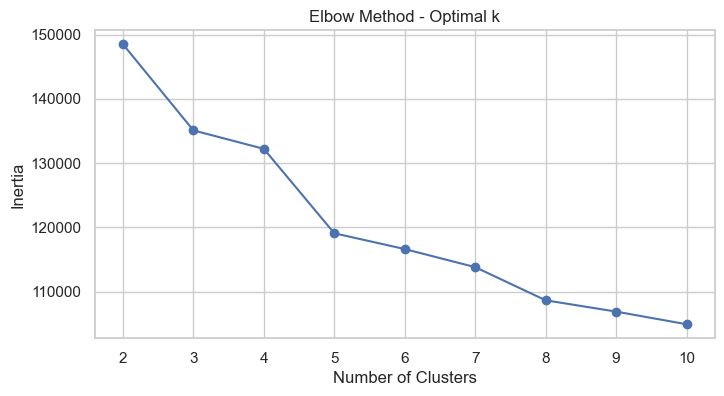

In [44]:
# Plot Elbow Curve (SSE vs. k)
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig("output/Elbow_Curve.png")  # save the plot
plt.show()

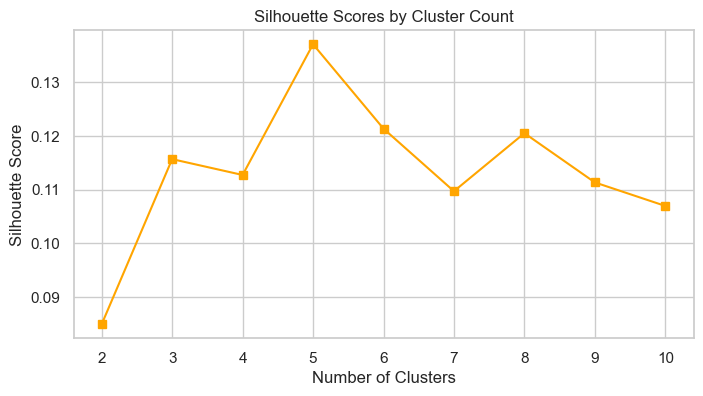

In [46]:
# Plot Silhouette Scores vs. k
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Scores by Cluster Count')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig("output/Silhouette_Scores.png")  # save the plot
plt.show()

In [48]:
# Based on Elbow and Silhouette plots, we choose an appropriate k (e.g., 4)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_data)

# Append the cluster labels to the original encoded dataset
encoded_df['Cluster'] = cluster_labels

In [50]:
# Group the data by cluster label and compute mean values for each feature
cluster_profile = encoded_df.groupby('Cluster').mean().round(2)
print("\nCluster Profiles:")
print(cluster_profile)


Cluster Profiles:
         ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
Cluster                                                                 
0             1289.39        43.45            0.52               9.91   
1             1771.59        43.50            0.51              10.07   
2             1568.32        42.95            0.50              10.08   
3             1524.68        43.38            0.49              10.24   

         CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
Cluster                                                                  
0                        3.03            0.57                     0.21   
1                        3.01            0.58                     0.21   
2                        2.96            0.54                     0.21   
3                        2.97            0.56                     0.19   

         ProductCategory_Smart Watches  ProductCategory_Smartphones  \
Cluster                   

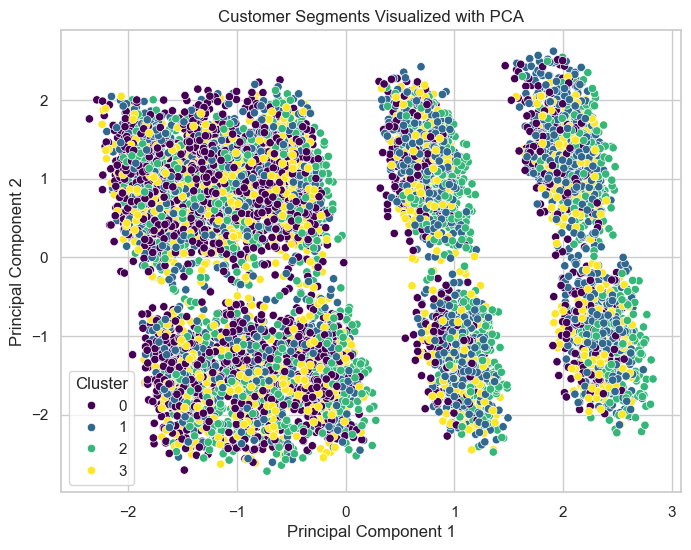

In [52]:
# We reduce the dimensionality of the data to 2 components for easy plotting and understanding
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig("output/Customer_Segment_by_PCA.png")  # save the plot
plt.show()

In [56]:
# Save results to CSV for use in dashboards or further analysis
encoded_df.to_csv("output/segmentation_results.csv", index=False)